# This notebook tests the implement of reverse compliment and reverse sequence similarity score and generate new fasta files with the rv and rv-comp sequences

In [1]:
# sequence analysis
from pyfaidx import Fasta
from Bio.Seq import Seq
from Bio import SeqIO, pairwise2

/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
import Bio

In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os

In [4]:
from matplotlib.patches import Patch

In [5]:
import sequence_comparison as seqComp

In [6]:
from math import comb

In [7]:
Bio.__version__

'1.83'

In [8]:
import time
import gc

## load data

In [9]:
genome_fasta = "/home/lucy/Dropbox/human_ref_genome/hg38_grch38/hg38.fa"

In [26]:
extract_fasta_result_dir = './sequence_similarity_input/'

In [11]:
tcps_indiv = pd.read_csv("./genoLoc_TCPS_Deseq_indiv_locus_result.csv" , header = 0, index_col = 0 )

## test small sequences
- pass the test

In [10]:
ncr_10 = comb( 10, 2)
ncr_20 = comb( 20, 2)

ncr_20 / ncr_10

4.222222222222222

In [54]:
seq0 = 'ATTTCGGAAAATTTGG'
seq0b = Seq(seq0)

In [55]:
seq1 = seq0b.complement()
seq2 = seq0b.reverse_complement()

In [56]:
print( seq0b)
print( seq1)
print( seq2)

ATTTCGGAAAATTTGG
TAAAGCCTTTTAAACC
CCAAATTTTCCGAAAT


make compliment but not rerverse

In [35]:
seq2 = Seq( seq0).complement()
seq2

Seq('TAAAGCCTTTTAAACC')

make reverse but not compliment

In [36]:
seq3 = seq2.reverse_complement()
seq3

Seq('GGTTTAAAAGGCTTTA')

## test seq from genome

In [7]:
genome_fasta = "/home/lucy/Dropbox/human_ref_genome/hg38_grch38/hg38.fa"

In [40]:
genome = Fasta(genome_fasta)

In [45]:
seq0 = genome[1][28335030:28335040].seq

In [46]:
seq0

'ctgtcatccg'

## test the updated seqComp function for sequence extraction
- pass the test

In [12]:
tcps_indiv.head()

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genoName,genoStart,genoEnd,strand,seqLen,absolute_LFC
2361,MIRb_2591,21.977249,2.001854,0.495015,4.044027,0.000053,0.008073,chr1,21875471,21875616,-,145.0,2.001854
2983,MIRb_3645,10.310570,2.238395,0.535974,4.176310,0.000030,0.005203,chr1,26188068,26188211,+,143.0,2.238395
2992,LTR10A_6,7.215176,4.566861,1.173587,3.891371,0.000100,0.013165,chr1,26268832,26269405,+,573.0,4.566861
3068,MIR_2537,1.101041,3.860287,1.037415,3.721063,0.000198,0.022386,chr1,26554369,26554498,+,129.0,3.860287
3286,AluSp_907,2.735933,3.134858,0.762647,4.110499,0.000039,0.006472,chr1,27730174,27730485,-,311.0,3.134858


In [13]:
region_df_cols = [ 'genoName', 'genoStart', 'genoEnd', 'strand', 'TE name'] 

In [14]:
seqComp.extract_ucsc_bedlike_regions( genome_fasta= genome_fasta,
                                     regions_df=tcps_indiv[region_df_cols].head(),
                                     output_fasta= extract_fasta_result_dir + 'test_rv_com_self.fasta' ,
                                     score_reverse_compliment= True ) 

✅ Extracted sequences saved to: ./sequence_similarity_input/test_rv_com_self.fasta


### score the test case

In [15]:
f = extract_fasta_result_dir + 'test_rv_com_self.fasta'

In [16]:
TIME_S = time.time()
seqComp.process_group(f, out_dir="sequence_similarity_results", n_jobs=4,plot_heatmap=True )
TIME_E = time.time()
TOTAL_TIME = (TIME_E - TIME_S)/60
print( f"Time used: {TOTAL_TIME:.1f} min" )

Loaded 15 sequences from ./sequence_similarity_input/test_rv_com_self.fasta
Average identity: 43.52% ± 14.57%
Time used: 0.0 min


In [18]:
comb( 30, 2)

435

## generate new fastqs from mouse data ( squire quantified)

### load and prepare input data

In [9]:
squire_indiv = pd.read_csv("/home/lucy/Dropbox/turner_organoid_bulk_RNA_local/Deseq_indiv_dTE_results.csv", header = 0, index_col = 0 )

In [10]:
squire_indiv.head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,repName,repFamily,repClass,genoName,genoStart,genoEnd,strand
0,"chr13|73480020|73480091|PB1D9:Alu:SINE|268|-,.",9.000885,-0.489762,0.629289,-0.778278,0.800222,1.0,TE,PB1D9:Alu:SINE,PB1D9:Alu:SINE_268,PB1D9,Alu,SINE,chr13,73480020,73480091,-
1,"chr5|117467874|117468005|RSINE1:B4:SINE|183|-,.",0.730917,-2.916743,3.081604,-0.946502,0.368835,1.0,TE,RSINE1:B4:SINE,RSINE1:B4:SINE_183,RSINE1,B4,SINE,chr5,117467874,117468005,-
2,"chr3|96619212|96619284|ID4:ID:SINE|194|+,.",5.772588,0.121464,0.852163,0.142536,0.942801,1.0,TE,ID4:ID:SINE,ID4:ID:SINE_194,ID4,ID,SINE,chr3,96619212,96619284,+
3,"chr15|93388865|93388965|PB1:Alu:SINE|227|-,.",32.028966,-0.216654,0.390147,-0.555314,0.978578,1.0,TE,PB1:Alu:SINE,PB1:Alu:SINE_227,PB1,Alu,SINE,chr15,93388865,93388965,-
4,"chr11|94175967|94176153|B2_Mm2:B2:SINE|98|-,.",7.127690,0.305487,0.591882,0.516129,0.893386,1.0,TE,B2_Mm2:B2:SINE,B2_Mm2:B2:SINE_98,B2_Mm2,B2,SINE,chr11,94175967,94176153,-


In [11]:
squire_df_ind = squire_indiv.index.astype(str) + "_" + squire_indiv['repName']
squire_indiv['df_index_repName'] = squire_df_ind

In [12]:
#squire_indiv.set_index( 'df_index_repName', inplace=True)

In [13]:
seqlen = squire_indiv['genoEnd'] - squire_indiv['genoStart']
squire_indiv['seqLen'] = seqlen

In [14]:
squire_indiv.shape

(15235, 19)

In [15]:
squire_sig = squire_indiv[squire_indiv['padj']< 1e-5] 
squire_sig.shape

(114, 19)

re-sampling step here

In [24]:
dTE_bs2, dTE_bp2, dTE_be2 = seqComp.get_target_distribution_bins( squire_sig, 'seqLen' , binw_constant= 0.2)

ret_df_ls2, smooth_s2, smooth_e2 = seqComp.match_bins( target_bin_starts = dTE_bs2 , target_bin_end = dTE_be2,
               pool_df = squire_indiv, pool_df_col_name = 'seqLen' )

smooth start set True
smooth end set True


/home/lucy/VU Basic Sciences Dropbox/Lucy Chen/telescope_run/sequence_comparison.py:286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df[target_col_name] = target_df[target_col_name].astype(float)


In [25]:
bw2_resampled_df = seqComp.re_sample_pool_df( ret_df_ls2, smooth_s2, smooth_e2, dTE_bp2 , verbose=True) 

20
||||| Testting: Pre-adjustment probability list for the pool data is 
[0.009556624626186451, 0.8019763359771162, 0.08431933428682876, 0.03731634377844233, 0.013262254583279157, 0.010531790404368743, 0.005135873098426733, 0.0036406189052138865, 0.0062410609803666625, 0.0014302431413340268, 0.0016902873488493044, 0.0026654531270315952, 0.0015602652450916656, 0.006891171499154856, 0.00214536471200104, 0.0033155636458197892, 0.0031855415420621504, 0.001300221037576388, 0.0009101547263034716, 0.0013652320894552074, 0.0015602652450916656]
||||| Testting: Target probability list for the pool data is 
[0.001, 0.31484493886760767, 0.2273880114043833, 0.05247415647793461, 0.043728463731612176, 0.07871123471690192, 0.05247415647793461, 0.026237078238967305, 0.05247415647793461, 0.01749138549264487, 0.026237078238967305, 0.0009970089730807576, 0.008745692746322435, 0.008745692746322435, 0.008745692746322435, 0.008745692746322435, 0.0009970089730807576, 0.0009970089730807576, 0.00874569274632243

In [26]:
bw2_resampled_df.shape

(958, 19)

In [27]:
cp = sn.color_palette("colorblind")
cp

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

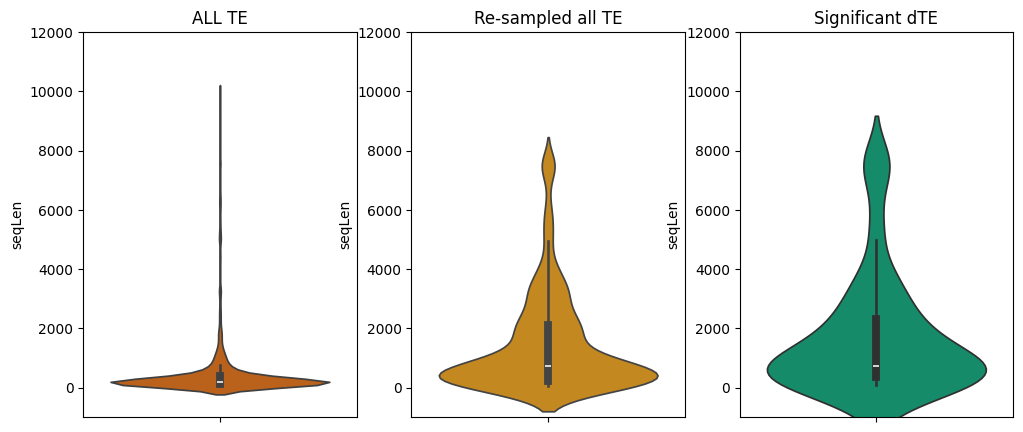

In [28]:
f,axes = plt.subplots( ncols=3, nrows = 1, figsize = [12,5])
sn.violinplot( squire_indiv['seqLen'], ax = axes[0], color = cp[3] )
axes[0].set_title("ALL TE")

sn.violinplot( bw2_resampled_df['seqLen'], ax = axes[1], color = cp[1] )
axes[1].set_title("Re-sampled all TE")

sn.violinplot( squire_sig['seqLen'], ax = axes[2], color = cp[2] )
axes[2].set_title("Significant dTE")


axes[0].set_ylim([-1000, 12000] )
axes[1].set_ylim( [-1000,12000])
axes[2].set_ylim( [-1000,12000])

plt.show()

### save new fasta

In [16]:
mm39_path = '/home/lucy/Dropbox/mouse_ref_genome_mm39/mm39.fa'

In [30]:
resampled_df = bw2_resampled_df

In [31]:
rand_df_ls = []
rand_df_names = [] # rand{n_element}_{rep}

n_elements = [ 10, 20, 50 ]
nreps = 3

for ele in n_elements:
    for rep in range(nreps):
        subdf = resampled_df.sample( n = ele, random_state= 250+rep+ele ) #my number when I do research @_@
        rand_name = f"rand{ele}_{rep+1}"
        print( rand_name )

        rand_df_ls.append( subdf )
        rand_df_names.append( rand_name )


rand10_1
rand10_2
rand10_3
rand20_1
rand20_2
rand20_3
rand50_1
rand50_2
rand50_3


In [32]:
rand_df_ls[0].head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,repName,repFamily,repClass,genoName,genoStart,genoEnd,strand,df_index_repName,seqLen
14860,chr7|125060668|125061385|RMER13A2:ERVK:LTR|171...,54.368612,-0.036847,0.234673,-0.157014,0.999985,1.0,TE,RMER13A2:ERVK:LTR,RMER13A2:ERVK:LTR_171,RMER13A2,ERVK,LTR,chr7,125060668,125061385,-,14860_RMER13A2,717
13184,"chr19|45044416|45044531|PB1D9:Alu:SINE|202|-,.",10.168657,0.794385,0.649654,1.222780,0.627060,1.0,TE,PB1D9:Alu:SINE,PB1D9:Alu:SINE_202,PB1D9,Alu,SINE,chr19,45044416,45044531,-,13184_PB1D9,115
8565,"chr1|131951767|131951893|PB1D7:Alu:SINE|246|+,.",12.656917,-0.304976,0.468746,-0.650621,0.933612,1.0,TE,PB1D7:Alu:SINE,PB1D7:Alu:SINE_246,PB1D7,Alu,SINE,chr1,131951767,131951893,+,8565_PB1D7,126
14799,"chr7|128044931|128045034|PB1D7:Alu:SINE|268|+,.",7.120295,0.291715,0.666571,0.437636,0.882334,1.0,TE,PB1D7:Alu:SINE,PB1D7:Alu:SINE_268,PB1D7,Alu,SINE,chr7,128044931,128045034,+,14799_PB1D7,103
4513,"chr10|81017517|81017609|B1_Mus2:Alu:SINE|181|+,.",22.984322,0.475297,0.376509,1.262379,0.918325,1.0,TE,B1_Mus2:Alu:SINE,B1_Mus2:Alu:SINE_181,B1_Mus2,Alu,SINE,chr10,81017517,81017609,+,4513_B1_Mus2,92


In [24]:
region_df_cols = ['genoName', 'genoStart', 'genoEnd', 'strand', 'df_index_repName' ]

In [28]:
output_fasta_folder = './sequence_similarity_input/score_rv_comple_trial/'

In [35]:
for i,d in enumerate( rand_df_ls):
    seqComp.extract_ucsc_bedlike_regions( genome_fasta= mm39_path,
                                         regions_df= d[region_df_cols ], 
                                         output_fasta=output_fasta_folder + 'squire_' + rand_df_names[i] +'.fasta',
                                        score_reverse_compliment = True) 

✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/squire_rand10_1.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/squire_rand10_2.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/squire_rand10_3.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/squire_rand20_1.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/squire_rand20_2.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/squire_rand20_3.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/squire_rand50_1.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/squire_rand50_2.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/squire_rand50_3.fasta


In [36]:
wt_up = pd.read_csv("./compare_dTE_overlap/squire_sig_down.csv",header = 0, index_col = 0 )

In [37]:
wt_up['df_index_repName'] = wt_up.index.astype(str) + "_" + wt_up['repName']

In [38]:
wt_up.shape

(33, 18)

In [39]:
wt_up.sort_values( by = 'log2FoldChange', ascending = True , inplace= True )
wt_up.head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,repName,repFamily,repClass,genoName,genoStart,genoEnd,strand,df_index_repName
4485,"chrY|1046951|1048785|Lx2B2:L1:LINE|166|+,.",41.184881,-8.735873,1.051304,-8.309562,9.309039e-14,1.761051e-11,TE,Lx2B2:L1:LINE,Lx2B2:L1:LINE_166,Lx2B2,L1,LINE,chrY,1046951,1048785,+,4485_Lx2B2
6115,chr19|36949092|36949293|ORR1B1-int:ERVL-MaLR:L...,37.460687,-8.598821,1.054039,-8.157969,2.813290e-13,5.170024e-11,TE,ORR1B1-int:ERVL-MaLR:LTR,ORR1B1-int:ERVL-MaLR:LTR_203,ORR1B1-int,ERVL-MaLR,LTR,chr19,36949092,36949293,+,6115_ORR1B1-int
249,chr13|68590731|68597820|RLTR4_MM-int:LTR:LTR|3...,33.623029,-8.445261,1.049767,-8.044888,6.595240e-13,1.134240e-10,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_321,RLTR4_MM-int,LTR,LTR,chr13,68590731,68597820,-,249_RLTR4_MM-int
5703,"chr19|36948880|36949059|B3:B2:SINE|210|+,.",33.652405,-8.443296,1.066800,-7.914598,1.505438e-12,2.495612e-10,TE,B3:B2:SINE,B3:B2:SINE_210,B3,B2,SINE,chr19,36948880,36949059,+,5703_B3
10291,"chr19|37212352|37212822|Lx8:L1:LINE|254|+,.",33.476036,-8.439185,1.050746,-8.031615,7.212397e-13,1.233780e-10,TE,Lx8:L1:LINE,Lx8:L1:LINE_254,Lx8,L1,LINE,chr19,37212352,37212822,+,10291_Lx8


In [40]:
wt_top10_df = wt_up.iloc[0:10][[ 'genoName', 'genoStart', 'genoEnd', 'strand', 'df_index_repName'] ] 
wt_top20_df = wt_up.iloc[0:20][[ 'genoName', 'genoStart', 'genoEnd', 'strand', 'df_index_repName'] ]
wt_top_all = wt_up[[ 'genoName', 'genoStart', 'genoEnd', 'strand', 'df_index_repName'] ]

In [41]:
wt_df_ls = [ wt_top10_df, wt_top20_df,wt_top_all ] 
wt_df_names = [ f'wt_up_top{x}' for x in [10, 20, 33] ]
wt_df_names

['wt_up_top10', 'wt_up_top20', 'wt_up_top33']

In [42]:
for i,d in enumerate( wt_df_ls):
    seqComp.extract_ucsc_bedlike_regions( genome_fasta= mm39_path,
                                         regions_df= d[region_df_cols ], 
                                         output_fasta=output_fasta_folder + 'squire_' + wt_df_names[i] +'.fasta',
                                        score_reverse_compliment = True) 

✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/squire_wt_up_top10.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/squire_wt_up_top20.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/squire_wt_up_top33.fasta


In [17]:
squire_sig_up = pd.read_csv("./compare_dTE_overlap/squire_sig_up.csv", header = 0, index_col = 0 )
squire_sig_up.head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,repName,repFamily,repClass,genoName,genoStart,genoEnd,strand
279_RLTR4_MM-int,chr7|116034016|116036134|RLTR4_MM-int:LTR:LTR|...,13.232138,7.261792,1.103073,6.583238,6.866753e-09,8.559487e-07,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_33,RLTR4_MM-int,LTR,LTR,chr7,116034016,116036134,+
845_L1MC2,"chr5|96975368|96975991|L1MC2:L1:LINE|284|-,.",84.993681,2.143785,0.213613,10.035838,4.290302e-08,4.946900e-06,TE,L1MC2:L1:LINE,L1MC2:L1:LINE_284,L1MC2,L1,LINE,chr5,96975368,96975991,-
1028_RMER17B2,"chr13|4307360|4308212|RMER17B2:ERVK:LTR|222|+,.",57.907641,2.313474,0.250347,9.241055,7.746373e-08,8.620185e-06,TE,RMER17B2:ERVK:LTR,RMER17B2:ERVK:LTR_222,RMER17B2,ERVK,LTR,chr13,4307360,4308212,+
1229_IAPLTR1_Mm,"chr6|28924173|28924528|IAPLTR1_Mm:ERVK:LTR|92|-,.",22.575679,7.303348,1.085208,6.729908,3.153163e-09,4.008132e-07,TE,IAPLTR1_Mm:ERVK:LTR,IAPLTR1_Mm:ERVK:LTR_92,IAPLTR1_Mm,ERVK,LTR,chr6,28924173,28924528,-
1401_RLTR4_Mm,"chr15|76450505|76451202|RLTR4_Mm:ERV1:LTR|14|-,.",49.190795,7.103274,1.107265,6.415154,1.773626e-08,2.128352e-06,TE,RLTR4_Mm:ERV1:LTR,RLTR4_Mm:ERV1:LTR_14,RLTR4_Mm,ERV1,LTR,chr15,76450505,76451202,-


In [18]:
squire_sig_up.columns

Index(['TE_ID', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue',
       'padj', 'element_type', 'TE_name', 'TE_index', 'repName', 'repFamily',
       'repClass', 'genoName', 'genoStart', 'genoEnd', 'strand'],
      dtype='object')

In [19]:
squire_sig_up['df_index_repName'] = squire_sig_up.index

In [20]:
squire_sig_up.sort_values( by= 'log2FoldChange', ascending= False , inplace= True )

In [21]:
squire_sig_up.head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,repName,repFamily,repClass,genoName,genoStart,genoEnd,strand,df_index_repName
9437_RLTR4_MM-int,chr13|22000000|22003430|RLTR4_MM-int:LTR:LTR|2...,2133.943181,14.594942,1.021194,14.292037,9.752864e-41,4.978605e-38,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_23,RLTR4_MM-int,LTR,LTR,chr13,22000000,22003430,+,9437_RLTR4_MM-int
11292_RLTR4_Mm,"chr13|22003625|22004366|RLTR4_Mm:ERV1:LTR|32|+,.",571.993187,12.694959,1.026310,12.369514,2.210350e-30,8.998084e-28,TE,RLTR4_Mm:ERV1:LTR,RLTR4_Mm:ERV1:LTR_32,RLTR4_Mm,ERV1,LTR,chr13,22003625,22004366,+,11292_RLTR4_Mm
12455_RLTR4_Mm,"chr13|21996579|21997320|RLTR4_Mm:ERV1:LTR|32|+,.",440.726573,12.319839,1.027687,11.987932,1.619963e-28,5.988278e-26,TE,RLTR4_Mm:ERV1:LTR,RLTR4_Mm:ERV1:LTR_32,RLTR4_Mm,ERV1,LTR,chr13,21996579,21997320,+,12455_RLTR4_Mm
4915_RLTR4_MM-int,chr13|22003422|22003625|RLTR4_MM-int:LTR:LTR|5...,321.002608,11.862092,1.023460,11.590188,1.294914e-26,4.430260e-24,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_5,RLTR4_MM-int,LTR,LTR,chr13,22003422,22003625,+,4915_RLTR4_MM-int
4128_RLTR4_MM-int,chr13|21997320|22000000|RLTR4_MM-int:LTR:LTR|1...,977.486167,9.566972,0.438444,21.820302,2.533456e-85,2.628257e-82,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_13,RLTR4_MM-int,LTR,LTR,chr13,21997320,22000000,+,4128_RLTR4_MM-int


In [48]:
squire_top10_df = squire_sig_up.iloc[0:10][[ 'genoName', 'genoStart', 'genoEnd', 'strand', 'df_index_repName'] ] 
squire_top20_df = squire_sig_up.iloc[0:20][[ 'genoName', 'genoStart', 'genoEnd', 'strand', 'df_index_repName'] ]
squire_last50_df = squire_sig_up.iloc[-50::][[ 'genoName', 'genoStart', 'genoEnd', 'strand', 'df_index_repName'] ] 

In [22]:
squire_top50_df = squire_sig_up.iloc[0:50][[ 'genoName', 'genoStart', 'genoEnd', 'strand', 'df_index_repName'] ] 

In [49]:
mut_df_ls = [ squire_top10_df, squire_top20_df,squire_last50_df ] 
mut_df_names = [ f'mut_up_top{x}' for x in [10, 20] ] + ['mut_up_last50']
mut_df_names

['mut_up_top10', 'mut_up_top20', 'mut_up_last50']

In [50]:
for i,d in enumerate( mut_df_ls):
    seqComp.extract_ucsc_bedlike_regions( genome_fasta= mm39_path,
                                         regions_df= d[region_df_cols ], 
                                         output_fasta=output_fasta_folder + 'squire_' + mut_df_names[i] +'.fasta',
                                        score_reverse_compliment = True) 

✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/squire_mut_up_top10.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/squire_mut_up_top20.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/squire_mut_up_last50.fasta


In [29]:
seqComp.extract_ucsc_bedlike_regions( genome_fasta= mm39_path,
                                         regions_df= squire_top50_df[region_df_cols ], 
                                         output_fasta=output_fasta_folder + 'squire_' + 'mut_up_top50' +'.fasta',
                                        score_reverse_compliment = True) 

✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/squire_mut_up_top50.fasta


## Generate new fasta from human TCPS

### load deseq table and prepare data

In [51]:
tcps_indiv = pd.read_csv("./TCPS_all_Deseq_indiv_locus.csv", header = 0, index_col = 0 )
tcps_indiv.head()

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genoName,genoStart,genoEnd,strand,seqLen,absolute_LFC
166553,Alu_4200,0.228317,0.402569,1.563272,0.257517,0.796780,0.999991,chr20,49158505,49158527,+,22,0.402569
133439,MIR1_Amn_9014,0.594186,-1.274058,1.028602,-1.238630,0.215482,0.999991,chr15,75639564,75639587,+,23,1.274058
156965,MIRb_204437,0.804711,-0.309917,1.389233,-0.223085,0.823469,0.999991,chr19,13799682,13799706,-,24,0.309917
100591,L2c_90080,2.784909,3.665215,1.451265,2.525531,0.011552,0.455554,chr10,104039148,104039173,+,25,3.665215
126084,L2c_113491,0.034266,0.511230,3.833625,0.133354,0.893913,0.999991,chr14,68067960,68067985,-,25,0.511230


In [52]:
indiv_dTE_sig = tcps_indiv[tcps_indiv['padj'] < 0.05 ]

In [53]:
ser_up = indiv_dTE_sig[ indiv_dTE_sig['log2FoldChange'] > 2 ] 
ad_up = indiv_dTE_sig[ indiv_dTE_sig['log2FoldChange'] < -2  ] 

print( ser_up.shape)
print( ad_up.shape)

(133, 13)
(9, 13)


In [54]:
ser_up.sort_values( by = 'log2FoldChange', ascending= False, inplace= True )
ad_up.sort_values( by = 'log2FoldChange', ascending= True, inplace= True )

/tmp/ipykernel_47072/774895865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ser_up.sort_values( by = 'log2FoldChange', ascending= False, inplace= True )
/tmp/ipykernel_47072/774895865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_up.sort_values( by = 'log2FoldChange', ascending= True, inplace= True )


In [55]:
tcps_resampled_all = pd.read_csv("./resampled_TCPS_all_TE_indi.csv", header = 0, index_col = 0 )
tcps_resampled_all.head()

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genoName,genoStart,genoEnd,strand,seqLen,absolute_LFC
36886,MIRc_22786,0.066390,1.682504,4.531276,0.371309,0.710407,0.999991,chr3,131001128,131001156,+,28,1.682504
53559,L1ME1_10466,0.043117,0.617888,4.538229,0.136152,0.891701,0.999991,chr5,133979389,133979415,-,26,0.617888
131270,L1ME4a_28134,0.085216,0.737378,3.899024,0.189119,0.850000,0.999991,chr15,52291703,52291731,-,28,0.737378
46781,LTR6A_51,1.789616,0.056481,0.671609,0.084098,0.932979,0.999991,chr4,143425059,143425087,-,28,0.056481
100591,L2c_90080,2.784909,3.665215,1.451265,2.525531,0.011552,0.455554,chr10,104039148,104039173,+,25,3.665215


In [56]:
resampled_df = tcps_resampled_all

In [57]:
rand_df_ls = []
rand_df_names = [] # rand{n_element}_{rep}

n_elements = [ 10, 20, 50 ]
nreps = 3

for ele in n_elements:
    for rep in range(nreps):
        subdf = resampled_df.sample( n = ele, random_state= 250+rep+ele ) #my number when I do research @_@
        rand_name = f"rand{ele}_{rep+1}"
        print( rand_name )

        rand_df_ls.append( subdf )
        rand_df_names.append( rand_name )


rand10_1
rand10_2
rand10_3
rand20_1
rand20_2
rand20_3
rand50_1
rand50_2
rand50_3


In [58]:
rand_df_ls[0].head()

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genoName,genoStart,genoEnd,strand,seqLen,absolute_LFC
148109,AluJb_108243,0.056482,0.436968,3.232050,0.135198,0.892455,0.999991,chr17,46160309,46160589,-,280,0.436968
91011,HERVK9-int_374,0.966568,-0.335473,0.681052,-0.492581,0.622309,0.999991,chrX,65438942,65440050,-,1108,0.335473
83540,L2a_91503,0.082886,0.902089,1.892725,0.476609,0.633641,0.999991,chr9,68793125,68794216,-,1091,0.902089
1895,MIRb_2079,0.335510,-0.184742,1.306959,-0.141353,0.887591,0.999991,chr1,19242550,19242629,+,79,0.184742
87077,AluSp_24880,0.053832,0.238539,4.537840,0.052567,0.958077,0.999991,chr9,124892651,124892951,+,300,0.238539


In [59]:
region_df_cols = ['genoName', 'genoStart', 'genoEnd', 'strand', 'TE name' ]

In [60]:
output_fasta_folder = './sequence_similarity_input/score_rv_comple_trial/'

### save new fasta

In [61]:
region_df_cols = ['genoName', 'genoStart', 'genoEnd', 'strand', 'TE name' ]

In [62]:
hg38_ref_path = '/home/lucy/Dropbox/human_ref_genome/hg38_grch38/hg38.fa'

In [63]:
element_ranks = [ [0,10], [0,20], [0,50] , [-50, ser_up.shape[0]] ]
save_file_names = [ f'tcps_ser_up_top{x}.fasta' for x in [10,20,50] ] + ['tcps_ser_up_last50.fasta']

In [64]:
element_ranks[-1]

[-50, 133]

In [65]:
save_file_names

['tcps_ser_up_top10.fasta',
 'tcps_ser_up_top20.fasta',
 'tcps_ser_up_top50.fasta',
 'tcps_ser_up_last50.fasta']

In [66]:
for i,e in enumerate( element_ranks):
    seqComp.extract_ucsc_bedlike_regions( genome_fasta= hg38_ref_path,
                                     regions_df= ser_up[region_df_cols ].iloc[e[0]: e[1]], 
                                     output_fasta= output_fasta_folder + save_file_names[i], score_reverse_compliment= True) 

✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/tcps_ser_up_top10.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/tcps_ser_up_top20.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/tcps_ser_up_top50.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/tcps_ser_up_last50.fasta


In [67]:
seqComp.extract_ucsc_bedlike_regions( genome_fasta= hg38_ref_path,
                                     regions_df= ad_up[region_df_cols ], 
                                     output_fasta= output_fasta_folder + 'tcps_ad_up_all.fasta', score_reverse_compliment=True) 

✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/tcps_ad_up_all.fasta


In [68]:
for i,d in enumerate( rand_df_ls):
    seqComp.extract_ucsc_bedlike_regions( genome_fasta= hg38_ref_path,
                                         regions_df= d[region_df_cols ], 
                                         output_fasta=output_fasta_folder + 'tcps_' + rand_df_names[i] +'.fasta',
                                        score_reverse_compliment = True) 

✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/tcps_rand10_1.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/tcps_rand10_2.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/tcps_rand10_3.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/tcps_rand20_1.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/tcps_rand20_2.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/tcps_rand20_3.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/tcps_rand50_1.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/tcps_rand50_2.fasta
✅ Extracted sequences saved to: ./sequence_similarity_input/score_rv_comple_trial/tcps_rand50_3.fasta


## Calculate identity scores

In [69]:
fnames = os.listdir("./sequence_similarity_input/score_rv_comple_trial/")
fnames

['squire_rand50_1.fasta',
 'tcps_ser_up_top10.fasta',
 'squire_wt_up_top10.fasta',
 'tcps_rand10_3.fasta',
 'tcps_rand10_2.fasta',
 'squire_mut_up_last50.fasta',
 'squire_rand10_1.fasta',
 'squire_rand20_2.fasta',
 'squire_wt_up_top33.fasta',
 'tcps_ad_up_all.fasta',
 'tcps_ser_up_last50.fasta',
 'tcps_rand20_3.fasta',
 'tcps_rand20_1.fasta',
 'squire_rand10_2.fasta',
 'squire_rand50_2.fasta',
 'squire_rand20_1.fasta',
 'tcps_rand50_1.fasta',
 'squire_rand10_3.fasta',
 'tcps_ser_up_top20.fasta',
 'squire_wt_up_top20.fasta',
 'tcps_rand10_1.fasta',
 'tcps_rand50_2.fasta',
 'tcps_rand20_2.fasta',
 'tcps_ser_up_top50.fasta',
 'squire_mut_up_top20.fasta',
 'squire_rand20_3.fasta',
 'squire_mut_up_top10.fasta',
 'squire_rand50_3.fasta',
 'tcps_rand50_3.fasta']

In [30]:
input_dir = "./sequence_similarity_input/score_rv_comple_trial/"

In [ ]:
for f in fnames:
    print( f'Processing {f}')
    TIME_S = time.time()
    seqComp.process_group(input_dir + f, out_dir="sequence_similarity_results/score_rv_comple_result/", n_jobs=12,plot_heatmap=False )
    TIME_E = time.time()
    TOTAL_TIME = (TIME_E - TIME_S)/60
    print( f"Time used: {TOTAL_TIME:.1f} min" )

Processing squire_rand50_1.fasta
Loaded 150 sequences from ./sequence_similarity_input/score_rv_comple_trial/squire_rand50_1.fasta
Average identity: 30.87% ± 19.13%
Time used: 5.2 min
Processing tcps_ser_up_top10.fasta
Loaded 30 sequences from ./sequence_similarity_input/score_rv_comple_trial/tcps_ser_up_top10.fasta
Average identity: 37.99% ± 16.65%
Time used: 0.0 min
Processing squire_wt_up_top10.fasta
Loaded 30 sequences from ./sequence_similarity_input/score_rv_comple_trial/squire_wt_up_top10.fasta
Average identity: 26.94% ± 19.85%
Time used: 0.4 min
Processing tcps_rand10_3.fasta
Loaded 30 sequences from ./sequence_similarity_input/score_rv_comple_trial/tcps_rand10_3.fasta
Average identity: 49.33% ± 17.36%
Time used: 0.0 min
Processing tcps_rand10_2.fasta
Loaded 30 sequences from ./sequence_similarity_input/score_rv_comple_trial/tcps_rand10_2.fasta
Average identity: 36.56% ± 18.15%
Time used: 0.0 min
Processing squire_mut_up_last50.fasta
Loaded 150 sequences from ./sequence_similar

In [31]:
seqComp.process_group(input_dir + 'squire_mut_up_top50.fasta', out_dir="sequence_similarity_results/score_rv_comple_result/", n_jobs=12,plot_heatmap=False )

Loaded 150 sequences from ./sequence_similarity_input/score_rv_comple_trial/squire_mut_up_top50.fasta
Average identity: 30.27% ± 20.93%


(30.274115730462867, 20.934979764834537)

## save data

In [ ]:
squire_indiv # squire dTE table that has many useful annotation added
bw2_resampled_df # re-sampled all TE for squire quantified TEs

In [80]:
logi = pd.read_csv("./OUTPUT_EXPLAIN.csv", header = 0, index_col = 0 )
logi.columns

Index(['count_table_indiv.csv', 'count_table_subF.csv', 'mm39_rmsk_full.tsv',
       'Deseq_indiv_locus_results.csv', 'genoLoc_Deseq_indiv_locus_result.csv',
       'compare_dTE_overlap/', 'genoLoc_TCPS_Deseq_indiv_locus_result.csv',
       'TCPS_all_Deseq_indiv_locus.csv', 'resampled_TCPS_all_TE_indi.csv',
       'TCPS_seq_similarity_summary_df.csv',
       'squire_tjp2_mut_seq_similarity_summary_df.csv',
       'squire_tjp2_wt_seq_similarity_summary_df.csv',
       'squire_tjp2_total_seq_similarity_summary_df.csv',
       'mouse_human_combined_similarity_suammry_df.csv',
       'squire_tjp2_total_seq_similarity_grouped_repClass_summary_df.csv',
       'TCPS_total_seq_similarity_grouped_repClass_summary_df.csv'],
      dtype='object')

In [81]:
squire_indiv.to_csv("./squire_all_Deseq_indiv_locus.csv", header = True, index = True )

In [83]:
bw2_resampled_df.to_csv("./resampled_squire_all_TE_indi.csv", header = True, index = True)

In [84]:
logi['squire_all_Deseq_indiv_locus.csv'] = ['9' , 'NA' , 'squire all indiv deseq table with genoLoc and other related annotation']

In [86]:
logi['resampled_squire_all_TE_indi.csv'] = ['9' ,'NA', 're-sampled TEs from the all indiv deseq table that match the seqLen distribution from significant dTEs from squire Deseq result ( pajd < 1e-5 threshold used)' ]

In [87]:
logi.to_csv("./OUTPUT_EXPLAIN.csv", header = True, index = True )